# Random Number Generator using Rule30 Cellular Automata
### By Karan Shah and Ricardo Macias

** Usage: Make a new randGen30 object. **

** Call nextRand() method on that object ** 

** Syntax:**

** r3object = randGen30(seed)** leave blank for time seed

**newRandomNumber = r3object.nextRand(startInt, endInt) **Generate a
number between startInt and endInt. Leave blank for 0 and 1 limits. 

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def show_grid (grid):
    plt.matshow (grid)

The following functions simulate rule 30. Good for generating single random numbers and seeeingn cellular automata posts. For the actual generator that can be used multiple times, look at the class below these functions.

In [3]:
def genSeed():
    t = time.time()
    #print(t)
    t=int((t-int(t))*10**6)
    #print(t)
    s = str(bin(t))
    s = s[2:]
    #print(s)
    c = np.zeros(33)
    n = 16 - int(len(s)/2)
    for i in range(len(s)):
        c[n+i] = int(s[i])
    #print("Seed is:")
    return c

for i in range(20):
    genSeed()

8250

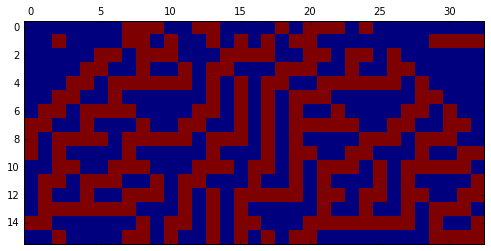

In [4]:
def rand30(seed = 0):
    if(seed == 0):
        seed = genSeed()
    
    rule30 = [0,1,1,1,1,0,0,0]
    ca = seed
    #print(type(seed[0]))
    ca_next = np.zeros(33)
    ca_whole = np.zeros((16,33))
    ca_whole[0,:]=ca 
    randnum = np.zeros(16)
    randnum[0] = ca[16]
    #print(ca)
    for i in range(1,16):
        ca_next = np.zeros(33)
        
        n = int(ca[32]*4+ca[0]*2+ca[1]*1)
        ca_next[0] = rule30[n]
        for j in range(1,32):
            #print("###")
            #print(j)
            n = ca[j-1]*4+ca[j]*2+ca[j+1]*1
            n = int(n)
            #print(n)
            ca_next[j] = rule30[n]
        n = int(ca[31]*4+ca[32]*2+ca[0]*1)
        ca_next[32] = rule30[n]
        randnum[i]= ca_next[16]
        ca_whole[i,:] = ca_next
        ca = ca_next
    
    #print(ca_next)
    
    ca_whole[1,:]=ca_next
    show_grid(ca_whole)
    #print(randnum)
    rstr = ''.join(str(e) for e in randnum.astype(int))
    return(int(rstr,2))
    
        
        

rand30()
    

## Use this class in your program

Use this in your program. Make an object of type randGen30(seed) and use the nextRand() function to generate new random numbers. Right now you have to normalize numbers yourself. 
Note: If you make an object without an argument, it will use current time as a seed.

In [5]:
class randGen30:
    rule30 = [0,1,1,1,1,0,0,0]
    
    def __init__(self,seed=0):
        self.seed = seed
        self.i = 0
        if(self.seed == 0):
            t = time.time()
            t = int((t-int(t))*10**6)
            s = str(bin(t))

        else:
            s = str(bin(int(self.seed)))
            if(len(s) > 33):
                s = s[0:33]
        
        s = s[2:]
        self.state = np.zeros(33)
        n = 16 - int(len(s)/2)
        for i in range(len(s)):
            self.state[n+i] = int(s[i])
        

    def nextRand(self, startint=0, endint=1):
        
        ca = self.state
        ca_next = np.zeros(33)
        
        randnum = np.zeros(16)
        randnum[0] = ca[16]

        for i in range(1,16):
            ca_next = np.zeros(33)
            n = int(ca[32]*4+ca[0]*2+ca[1]*1)
            ca_next[0] = randGen30.rule30[n]
            for j in range(1,32):
                n = ca[j-1]*4+ca[j]*2+ca[j+1]*1
                n = int(n)
                ca_next[j] = randGen30.rule30[n]
            n = int(ca[31]*4+ca[32]*2+ca[0]*1)
            ca_next[32] = randGen30.rule30[n]
            randnum[i]= ca_next[16]
            ca = ca_next
            
        self.state = ca
        rstr = ''.join(str(e) for e in randnum.astype(int))
        return(startint+(int(rstr,2)/65536)*(endint-startint))

In [6]:
#Default seed test

r = randGen30()
p = randGen30()
print("Random variable from obj r")
print(r.nextRand())
print(r.nextRand())
print(r.nextRand())
print(r.nextRand())

print("Random variable from obj p")
print(p.nextRand())
print(p.nextRand())
print(p.nextRand())
print(p.nextRand())

print(p.nextRand(10,30))
print(p.nextRand(10,30))
print(p.nextRand(10,30))
print(p.nextRand(10,30))

Random variable from obj r
0.6478271484375
0.271453857421875
0.1432952880859375
0.5638275146484375
Random variable from obj p
0.62786865234375
0.0591583251953125
0.9452972412109375
0.5573577880859375
27.44903564453125
21.685791015625
14.45068359375
13.1640625


In [7]:
#User provided seed test

r = randGen30(314159)
p = randGen30(314159)
print("Random variable from obj r")
print(r.nextRand())
print(r.nextRand())
print(r.nextRand())
print(r.nextRand())

print("Random variable from obj p")
print(p.nextRand())
print(p.nextRand())
print(p.nextRand())
print(p.nextRand())


Random variable from obj r
0.9569549560546875
0.591033935546875
0.095672607421875
0.0994110107421875
Random variable from obj p
0.9569549560546875
0.591033935546875
0.095672607421875
0.0994110107421875


0.99853515625
0.496813171387


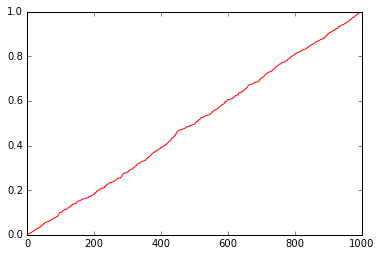

In [9]:
p = randGen30()

x = np.zeros(1000)
for i in range(1000):
    x[i] = p.nextRand()
    
print(np.amax(x))
y = np.sort(x)
a = range(1000)
plt.plot (a, y, 'r')
print(x.mean())